In [ ]:
#Importing Neccessary Libraries

import numpy as np
#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers # a layer consists of a tensor-in tensor-out computation function
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense, Flatten 
#Flatten-used fot flattering the input or change the dimension
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout #convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
#Creating the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Fitting the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5241 - accuracy: 0.4449 - val_loss: 1.2775 - val_accuracy: 0.5395
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1802 - accuracy: 0.5837 - val_loss: 1.2141 - val_accuracy: 0.5757
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0330 - accuracy: 0.6392 - val_loss: 0.9934 - val_accuracy: 0.6493
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9367 - accuracy: 0.6738 - val_loss: 0.9645 - val_accuracy: 0.6568
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8598 - accuracy: 0.6982 - val_loss: 0.8927 - val_accuracy: 0.6906
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8069 - accuracy: 0.7185 - val_loss: 0.8897 - val_accuracy: 0.6925
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7532 - accuracy: 0.7351 - val_loss: 0.9193 -

In [ ]:
#Saving our model
model.save('nutrition.h5')

In [ ]:
#Prediciting our results
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('nutrition.h5')

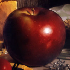

In [ ]:
img=image.load_img('/content/drive/MyDrive/Nutrition Image Analysis using CNN and Rapid API-20221106T044103Z-001/Nutrition Image Analysis using CNN and Rapid API/Dataset/TRAIN_SET/APPLES/n07740461_10065.jpg',target_size=(70,70))
img

In [ ]:
x= image.img_to_array(img)


In [ ]:
x = np.expand_dims(x, axis=0)

In [ ]:

index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']
result=str(index[0])
result

'APPLES'